In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st
import yfinance as yf

# 영화, tv 데이터 병합
df1 = pd.read_csv('G:\내 드라이브\Colab Notebooks\iM\\netflix_movies_detailed_up_to_2025.csv')
df2 = pd.read_csv('G:\내 드라이브\Colab Notebooks\iM\\netflix_tv_shows_detailed_up_to_2025.csv')
df = pd.concat([df1, df2], ignore_index=True)

# 날짜 칼럼 전처리
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = df['release_year'].astype(int)
df = df[
    (df['release_year'] >= 2021) & (df['release_year'] <= 2025)
]

# 투표수가 많은 영화 상위 15개 ( 투표수가 많다는건 그만큼 상업적으로 유명하기때문에 투표수를 기준점으로 잡음 )

df_1 = df.sort_values('vote_count',ascending=False)[['title','type','release_year','date_added','vote_count']]
top15_vote = df_1.head(15)



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 11000 to 31999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       10000 non-null  int64         
 1   type          10000 non-null  object        
 2   title         10000 non-null  object        
 3   director      6627 non-null   object        
 4   cast          9399 non-null   object        
 5   country       9093 non-null   object        
 6   date_added    10000 non-null  datetime64[ns]
 7   release_year  10000 non-null  int64         
 8   rating        10000 non-null  float64       
 9   duration      5000 non-null   object        
 10  genres        9647 non-null   object        
 11  language      10000 non-null  object        
 12  description   9091 non-null   object        
 13  popularity    10000 non-null  float64       
 14  vote_count    10000 non-null  int64         
 15  vote_average  10000 non-null  float64

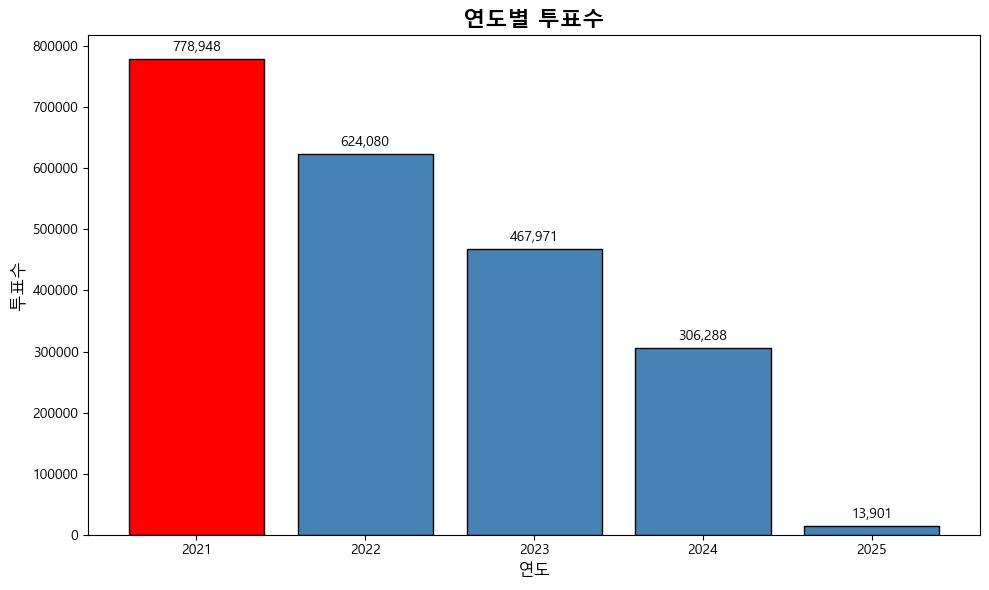

In [3]:
#================= 연도별 투표수 시각화 =====================


# 한글 폰트 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1) 연도별 vote_count 합계
yearly_votes = df_1.groupby('release_year')['vote_count'].sum().reset_index()

# 2) 최댓값 연도 찾기
max_year = yearly_votes.loc[yearly_votes['vote_count'].idxmax(), 'release_year']

# 3) 색상 지정 (최댓값만 빨강)
colors = ['red' if year == max_year else 'steelblue' for year in yearly_votes['release_year']]

# 4) 시각화
plt.figure(figsize=(10,6))
bars = plt.bar(yearly_votes['release_year'], yearly_votes['vote_count'], 
               color=colors, edgecolor='black')

# 막대 위에 수치 라벨링
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + yearly_votes['vote_count'].max()*0.01, 
             f"{int(yval):,}", ha='center', va='bottom', fontsize=10)

# 그래프 제목/축
plt.title('연도별 투표수', fontsize=16, fontweight='bold')
plt.xlabel('연도', fontsize=12)
plt.ylabel('투표수', fontsize=12)
plt.tight_layout()
plt.show()

 21년도에 투표수가 많았다는건 그만큼 대중들의 관심을 많이 받을만한 작품이 넷플릭스에 개봉됐다는걸 의미
(왜냐하면 전체 개봉된 작품은 각 연도별로 1000개로 동일 하기때문, ex. 특정 연도에 영화가 많이 개봉된게 아님)
가설 : 21년에 유명한 작품이 많이 개봉됐기 때문에 넷플릭스 주가에 영향을 주지않았을까?

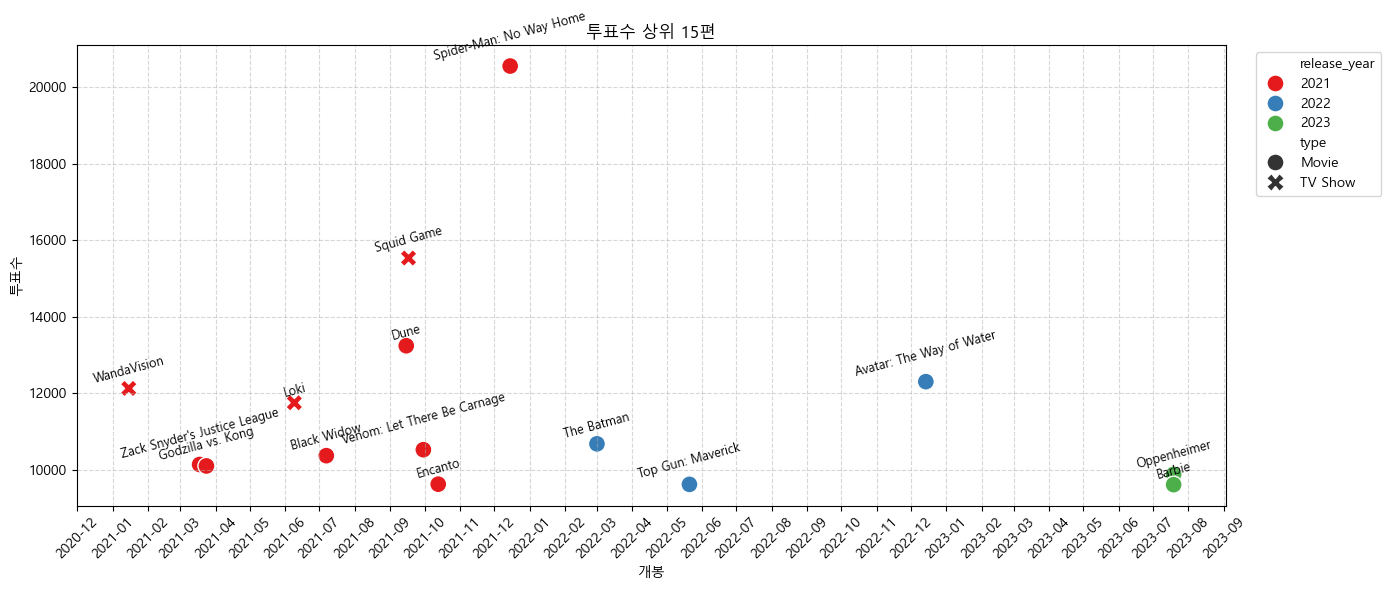

In [4]:
#================= 월별 투표수 상위15작품 시각화 =====================


# 산점도 (월 단위 x축)
plt.figure(figsize=(14,6))
ax = sns.scatterplot(
    data=top15_vote,
    x='date_added',
    y='vote_count',
    s=150,
    hue='release_year',   # 연도별 색 구분
    style='type',         # 타입별 모양 구분 (Movie/TV)
    palette='Set1'
)

# 점 옆에 title 라벨 추가
for i, row in top15_vote.iterrows():
    ax.text(
        row['date_added'],
        row['vote_count'] + 80,   # 점 위쪽으로 올림
        row['title'],
        ha='center', va='bottom', fontsize=9, rotation=15
    )

# x축 포맷: 월 단위
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 1달 간격 눈금
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.title('투표수 상위 15편')
plt.xlabel('개봉')
plt.ylabel('투표수')
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [5]:
# 투표수가 많은 영화 상위 15개 ( 투표수가 많다는건 그만큼 상업적으로 유명하기때문에 투표수를 기준점으로 잡음 )
top15_vote

,title,type,release_year,date_added,vote_count
11000,Spider-Man: No Way Home,Movie,2021,2021-12-15,20558
27001,Squid Game,TV Show,2021,2021-09-17,15536
11003,Dune,Movie,2021,2021-09-15,13242
12006,Avatar: The Way of Water,Movie,2022,2022-12-14,12303
27084,WandaVision,TV Show,2021,2021-01-15,12125
27043,Loki,TV Show,2021,2021-06-09,11751
12009,The Batman,Movie,2022,2022-03-01,10676
11010,Venom: Let There Be Carnage,Movie,2021,2021-09-30,10523
11020,Black Widow,Movie,2021,2021-07-07,10367
11019,Zack Snyder's Justice League,Movie,2021,2021-03-18,10136


대중적 관심이 높은 상위 15개의 작품의 넷플릭스 개봉일에 대한 주가 변동성을 파악

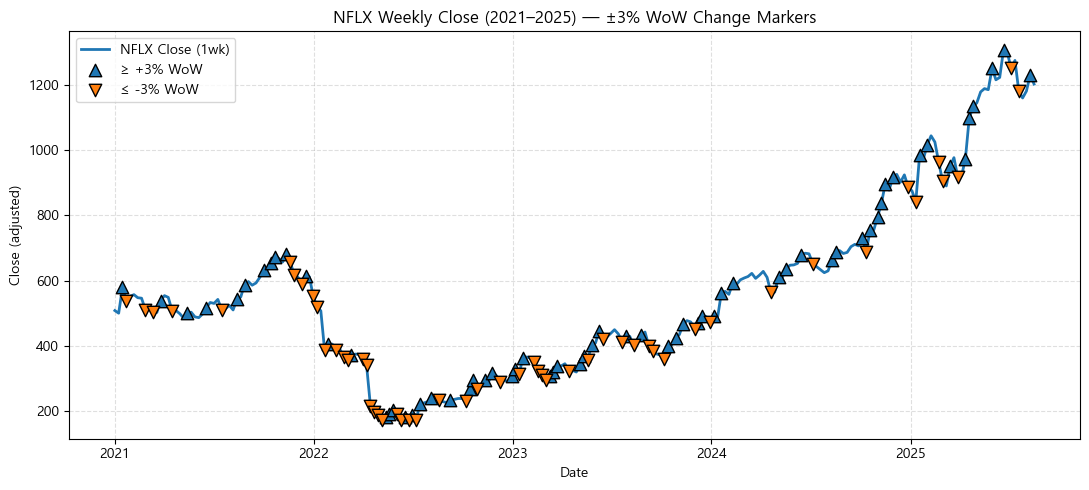

±3% 주간 변동 발생 주 수: 118


Price,Close,ret,ret_pct
Date,,,
2021-01-15,579.840027,0.157689,15.77
2021-01-22,538.599976,-0.071123,-7.11
2021-02-26,511.290009,-0.064770,-6.48
2021-03-12,504.790009,-0.034929,-3.49
2021-03-26,539.419983,0.072704,7.27
...,...,...,...
2025-05-30,1250.520020,0.055416,5.54
2025-06-20,1306.670044,0.069034,6.90
2025-07-04,1250.589966,-0.035916,-3.59


In [6]:
# -----------------------------
# 1) 데이터 다운로드 (주봉)
# -----------------------------
symbol = "NFLX"
start  = "2021-01-01"
end    = "2025-12-31"  # 25년 말까지 요청(실제 제공치는 최신 영업일까지)

px = yf.download(
    symbol,
    start=start,
    end=end,
    interval="1wk",
    auto_adjust=True,   # 조정 OHLC → 배당/분할 반영, 'Close'가 조정종가
    progress=False,
    threads=True,
)

if px.empty:
    raise RuntimeError("가격 데이터가 비었습니다. 네트워크/티커/날짜 범위를 확인하세요.")

# -----------------------------
# 2) 종가 컬럼 안전 탐지
#    (멀티인덱스/접미사까지 포괄)
# -----------------------------
def slice_or_flatten_columns(df, sym):
    if isinstance(df.columns, pd.MultiIndex):
        levels = [df.columns.get_level_values(i) for i in range(df.columns.nlevels)]
        try:
            if sym in levels[0]:
                return df.xs(sym, axis=1, level=0)
            if len(levels) > 1 and sym in levels[1]:
                return df.xs(sym, axis=1, level=1)
        except Exception:
            pass
        df.columns = ['_'.join([c for c in col if c]) for col in df.columns.to_flat_index()]
        return df
    return df

def pick_close_column(cols):
    cols = [str(c) for c in cols]
    # Adj Close 우선
    adj = [c for c in cols if ("adj" in c.lower()) and ("close" in c.lower())]
    if adj:
        return adj[0]
    # 일반 close(예: Close, Close_NFLX 등)
    close = [c for c in cols if ("close" in c.lower())]
    return close[0] if close else None

px = slice_or_flatten_columns(px, symbol)
close_col = pick_close_column(list(px.columns))
if close_col is None:
    raise ValueError(f"Close/Adj Close 컬럼을 찾지 못했습니다. columns={list(px.columns)}")

# -----------------------------
# 3) 전주 대비 수익률 & 3% 트리거
# -----------------------------
px["ret"] = px[close_col].pct_change()
mask = px["ret"].abs() >= 0.03
mask_up = (px["ret"] >= 0.03)
mask_dn = (px["ret"] <= -0.03)

# -----------------------------
# 4) 시각화
# -----------------------------
plt.figure(figsize=(11, 5))
plt.plot(px.index, px[close_col], label="NFLX Close (1wk)", linewidth=2)

# 상승/하락 트리거 마커(서로 다른 모양)
plt.scatter(px.index[mask_up], px[close_col][mask_up], marker="^", s=80, edgecolors="black", zorder=3, label="≥ +3% WoW")
plt.scatter(px.index[mask_dn], px[close_col][mask_dn], marker="v", s=80, edgecolors="black", zorder=3, label="≤ -3% WoW")

plt.title("NFLX Weekly Close (2021–2025) — ±3% WoW Change Markers")
plt.xlabel("Date")
plt.ylabel("Close (adjusted)")
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# -----------------------------
# 5) 결과 요약(선택)
# -----------------------------
hits = px.loc[mask, [close_col, "ret"]].copy()
hits["ret_pct"] = (hits["ret"] * 100).round(2)
print(f"±3% 주간 변동 발생 주 수: {len(hits)}")
display(hits)


In [7]:
# ===========================
# 이벤트(출시일) → 주봉으로 스냅 → hits 포함 여부 판단
# ===========================

# 0) 안전: 날짜형 보장
top15_vote["date_added"] = pd.to_datetime(top15_vote["date_added"], errors="coerce")

# 1) 출시일을 주봉 인덱스(px.index)의 '가장 가까운 주'로 스냅
def snap_to_week(d, weekly_index):
    pos = weekly_index.get_indexer([pd.to_datetime(d)], method="nearest")[0]
    return weekly_index[pos]

event_weeks_nearest = top15_vote["date_added"].apply(lambda d: snap_to_week(d, px.index))

# (선택) 야후는 주봉이 보통 '금요일 종가' 기준이라 W-FRI로 정렬해보는 엄격 버전도 제공
event_weeks_wfri = top15_vote["date_added"].dt.to_period("W-FRI").dt.end_time.dt.normalize()
# 정확히 일치하지 않으면 다시 nearest로 보정
event_weeks_wfri_aligned = event_weeks_wfri.apply(lambda d: snap_to_week(d, px.index))

# 2) hits(±3% 주간 변동 발생 주) 포함 여부 판단
nearest_in_hits = event_weeks_nearest.isin(hits.index)
wfri_in_hits    = event_weeks_wfri_aligned.isin(hits.index)

# 3) 결과 테이블: 주간수익률/종가까지 붙여서 확인
out = (
    top15_vote[["title", "date_added"]]
    .assign(
        week_nearest=event_weeks_nearest.values,
        week_wfri=event_weeks_wfri.values,
        week_wfri_aligned=event_weeks_wfri_aligned.values,
        in_hits_nearest=nearest_in_hits.values,
        in_hits_wfri=wfri_in_hits.values,
    )
    .merge(px[[close_col, "ret"]], left_on="week_nearest", right_index=True, how="left")
    .rename(columns={close_col: "close_week_nearest", "ret": "ret_week_nearest"})
)

out["ret_pct_week_nearest"] = (out["ret_week_nearest"] * 100).round(2)

print("=== 출시일과 주봉 매핑 → ±3% 변동성 여부 ===")
print(f"총 이벤트 수: {len(out)}")
print(f"±3% 변동(NEAREST) 발생: {int(out['in_hits_nearest'].sum())} / {len(out)}")
print(f"±3% 변동(W-FRI align) 발생: {int(out['in_hits_wfri'].sum())} / {len(out)}")

display(
    out[
        [
            "title",'date_added', "in_hits_nearest", "ret_pct_week_nearest"
        ]
    ].sort_values("date_added")
)




=== 출시일과 주봉 매핑 → ±3% 변동성 여부 ===
총 이벤트 수: 15
±3% 변동(NEAREST) 발생: 9 / 15
±3% 변동(W-FRI align) 발생: 9 / 15


C:\Users\82107\AppData\Local\Temp\ipykernel_3948\1037651128.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_vote["date_added"] = pd.to_datetime(top15_vote["date_added"], errors="coerce")


,title,date_added,in_hits_nearest,ret_pct_week_nearest
27084,WandaVision,2021-01-15,True,15.77
11019,Zack Snyder's Justice League,2021-03-18,False,-0.38
11039,Godzilla vs. Kong,2021-03-24,True,7.27
27043,Loki,2021-06-09,False,2.27
11020,Black Widow,2021-07-07,False,2.30
11003,Dune,2021-09-15,False,1.15
27001,Squid Game,2021-09-17,False,1.15
11010,Venom: Let There Be Carnage,2021-09-30,True,3.52
11001,Encanto,2021-10-13,True,3.05
11000,Spider-Man: No Way Home,2021-12-15,True,3.90
